##  Random Forest for Madrid Housing Prices

###  Library Imports

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import joblib
import numpy as np
import os
import seaborn as sns

### Data Loading

In [2]:
data = pd.read_csv(r"C:\Users\marin\Documents\TFM\TFM_VS_2\Rental-Price-Recommendation-System-in-Madrid-using-Machine-Learning\data\data_clean.csv")

In [3]:
data.shape

(73196, 38)

In [4]:
data.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'DISTRICT',
       'DISTRICT_CODE'],
      dtype='object')

In [5]:
data.sample(10)

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,DISTRICT,DISTRICT_CODE
50884,A9848375478549381918,201812,848000.0,4463.157895,190,3,2,1,1,1,...,0,1,0,5.268492,0.203510,0.999771,-3.677868,40.459609,Chamartin,4
18694,A12464467904897888438,201812,181000.0,3016.666667,60,2,1,0,0,0,...,0,0,1,0.706067,0.229800,0.715498,-3.701206,40.410560,Centro,3
66017,A3934829899702699329,201812,291000.0,2552.631579,114,4,2,0,1,0,...,0,0,1,4.126480,0.224457,2.581547,-3.658377,40.429965,Ciudad Lineal,6
36539,A10235754364924451089,201812,498000.0,4527.272727,110,3,2,1,1,0,...,0,0,1,3.099796,0.075124,1.901549,-3.669548,40.406811,Retiro,13
71658,A16387531445274096392,201812,226000.0,2054.545455,110,2,2,1,1,0,...,0,0,1,12.436432,2.438497,11.341342,-3.558337,40.401933,Vicalvaro,18
49898,A15607604572499753008,201812,180000.0,2400.000000,75,3,1,1,0,0,...,0,0,1,5.889689,0.650020,5.030182,-3.752119,40.378582,Carabanchel,2
26541,A1194455575419244071,201809,132000.0,2030.769231,65,3,1,0,1,1,...,0,0,1,4.874202,0.385609,3.334044,-3.730376,40.377767,Carabanchel,2
62130,A6766485624652515496,201806,274000.0,3425.000000,80,2,1,1,0,0,...,0,1,0,4.395413,0.506278,0.607861,-3.697383,40.455772,Tetuan,16
12466,A1364144364504754304,201803,232000.0,3362.318841,69,1,1,1,1,0,...,0,0,1,7.066697,0.113568,2.687216,-3.717870,40.479160,Fuencarral-El Pardo,7
62001,A475431099606321168,201806,718000.0,4632.258065,155,4,3,1,1,1,...,0,0,1,6.217175,0.546410,1.411250,-3.671819,40.466861,Chamartin,4


### Random Forest with GridSearchCV

In [6]:
features = [
    'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
    'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASGARDEN',
    'HASPARKINGSPACE', 'HASBOXROOM', 'HASWARDROBE', 'HASDOORMAN',
    'HASSWIMMINGPOOL', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
    'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
    'HASEASTORIENTATION', 'HASWESTORIENTATION',
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
    'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTRICT_CODE'
]

target = 'PRICE'


X = data[features].copy()
y = data[target].copy()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")


y_pred = grid_search.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 45,705.11
RMSE: 83,180.30
R²: 0.9294


### Random Forest Feature Importance: Top 15 Variables

C:\Users\marin\AppData\Local\Temp\ipykernel_20596\1877487308.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


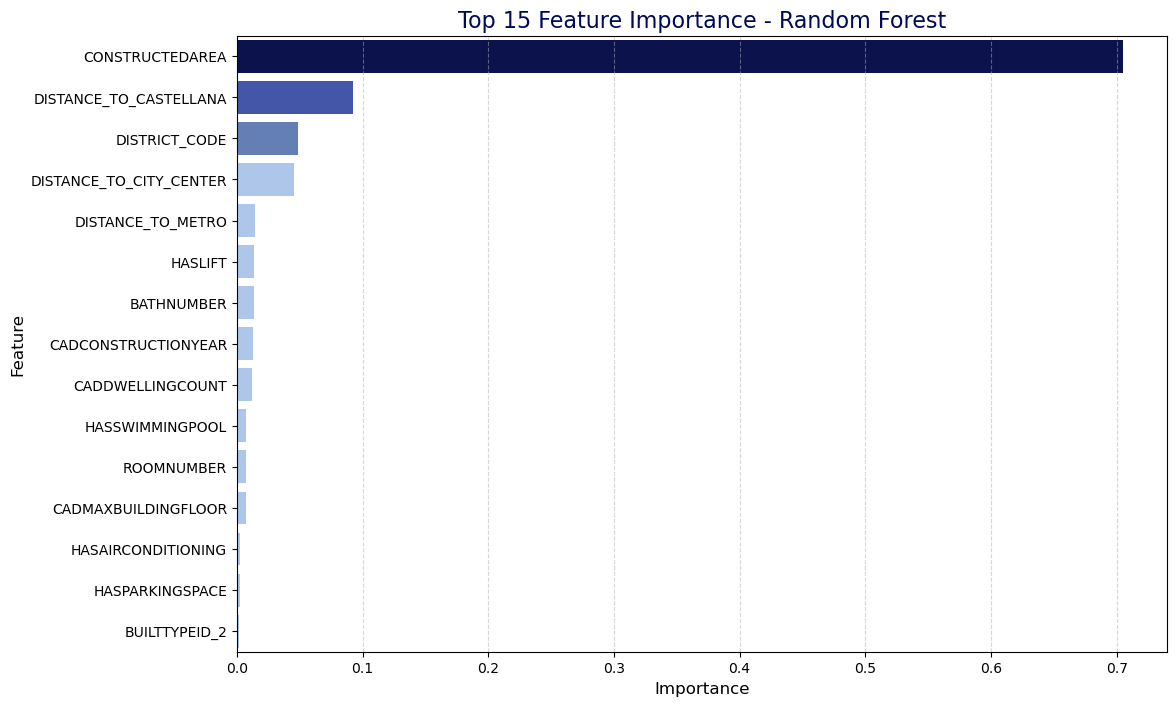

🔹 Top 15 Features:
                    Feature  Importance
0           CONSTRUCTEDAREA    0.704669
21   DISTANCE_TO_CASTELLANA    0.092622
28            DISTRICT_CODE    0.048554
19  DISTANCE_TO_CITY_CENTER    0.045521
20        DISTANCE_TO_METRO    0.014185
4                   HASLIFT    0.013480
2                BATHNUMBER    0.013426
22      CADCONSTRUCTIONYEAR    0.012437
24         CADDWELLINGCOUNT    0.012018
11          HASSWIMMINGPOOL    0.007438
1                ROOMNUMBER    0.007385
23      CADMAXBUILDINGFLOOR    0.006857
5        HASAIRCONDITIONING    0.002813
7           HASPARKINGSPACE    0.002129
26            BUILTTYPEID_2    0.001884


In [11]:

features = [
    'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
    'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASGARDEN',
    'HASPARKINGSPACE', 'HASBOXROOM', 'HASWARDROBE', 'HASDOORMAN',
    'HASSWIMMINGPOOL', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
    'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
    'HASEASTORIENTATION', 'HASWESTORIENTATION',
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
    'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTRICT_CODE'
]

X = data[features]
y = data['PRICE']  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

importances_list = []
seeds = [0, 42, 100, 2024]

for seed in seeds:
    rf = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=seed,
        n_jobs=-1
    )
    rf.fit(X_scaled, y)
    importances_list.append(rf.feature_importances_)

avg_importances = np.mean(importances_list, axis=0)

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': avg_importances
}).sort_values(by='Importance', ascending=False)


top_15 = importance_df.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=top_15,
    palette=['#000957', '#344CB7', '#577BC1'] + ['#A3C4F3']*(len(top_15)-3)
)

plt.title('Top 15 Feature Importance - Random Forest', fontsize=16, color='#000957')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


print("🔹 Top 15 Features:")
print(importance_df.head(15))


### Random Forest Training Using Top 15 Features

In [ ]:
top_features = [
    'CONSTRUCTEDAREA','DISTRICT_CODE',
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
    'BATHNUMBER', 'CADCONSTRUCTIONYEAR', 'CADDWELLINGCOUNT',
    'ROOMNUMBER', 'CADMAXBUILDINGFLOOR', 'BUILTTYPEID_2',
    'HASLIFT', 'HASAIRCONDITIONING', 'HASPARKINGSPACE',
    'HASWARDROBE', 'HASBOXROOM', 'HASTERRACE',
    'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN'
]

X = data[top_features]
y = data['PRICE'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2', 'sqrt']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mejores hiperparámetros:", grid_search.best_params_)
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 score: {r2:.4f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Mejores hiperparámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 47700.8720
RMSE: 85674.2581
R2 score: 0.9251


#### Real vs Predicted Property Prices

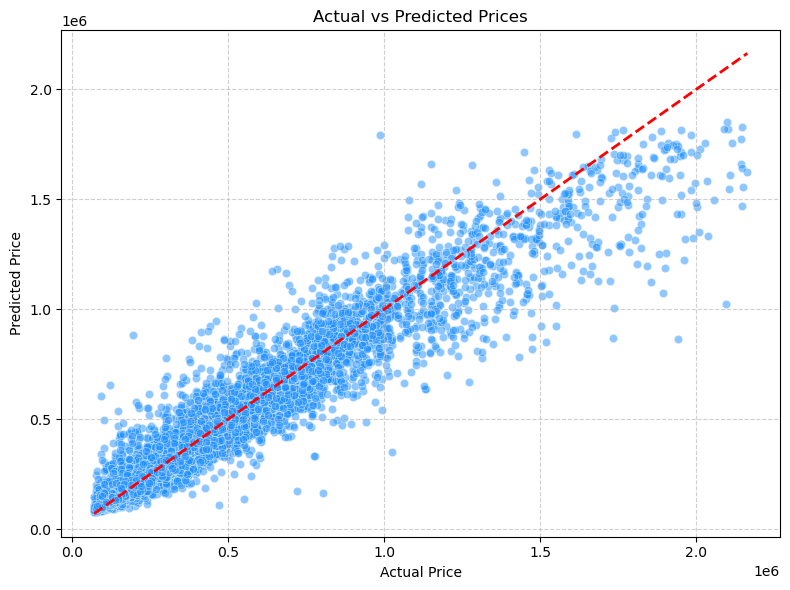

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Distribution of Prediction Error Ranges (%) 

In [14]:
df_errors = pd.DataFrame({
    'real': y_test,
    'predicho': y_pred
})

df_errors['ape'] = np.abs(df_errors['real'] - df_errors['predicho']) / df_errors['real'] * 100 

bins = [0, 5, 10, 15, 20, 25, 50, 100, np.inf]
labels = ['<=5%', '<=10%', '<=15%', '<=20%', '<=25%', '<=50%', '<=100%', '>100%']

df_errors['rango_error'] = pd.cut(df_errors['ape'], bins=bins, labels=labels, right=True)

tabla_error = df_errors['rango_error'].value_counts(normalize=True).sort_index() * 100

tabla_error

tabla_error_df = tabla_error.reset_index()
tabla_error_df.columns = ['Error Ranges %', 'Prediction Percentage']
tabla_error_df


,Error Ranges %,Prediction Percentage
0,<=5%,29.136494
1,<=10%,22.202487
2,<=15%,15.944801
3,<=20%,10.472742
4,<=25%,7.125290
5,<=50%,11.497472
6,<=100%,2.882908
7,>100%,0.737806


### Save Model for Dashboard Integration


In [15]:
import pickle
import os

# Save model and components
model_features = [
    'CONSTRUCTEDAREA', 'DISTANCE_TO_CASTELLANA', 'DISTRICT_CODE',
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
    'BATHNUMBER', 'CADCONSTRUCTIONYEAR', 'CADDWELLINGCOUNT',
    'ROOMNUMBER', 'CADMAXBUILDINGFLOOR', 'BUILTTYPEID_2',
    'HASLIFT', 'HASAIRCONDITIONING', 'HASPARKINGSPACE',
    'HASWARDROBE', 'HASBOXROOM', 'HASTERRACE',
    'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN'
]

# Create district mapping
district_mapping = {}
if 'DISTRICT' in data.columns and 'DISTRICT_CODE' in data.columns:
    district_mapping = dict(zip(data['DISTRICT'], data['DISTRICT_CODE']))

# Create models directory if it doesn't exist
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)

# Save all files in models directory
joblib.dump(best_rf, os.path.join(models_dir, 'random_forest_model.pkl'))

with open(os.path.join(models_dir, 'district_mapping.pkl'), 'wb') as f:
    pickle.dump(district_mapping, f)

with open(os.path.join(models_dir, 'model_features.pkl'), 'wb') as f:
    pickle.dump(model_features, f)

model_info = {
    'model_type': 'RandomForestRegressor',
    'features': model_features,
    'performance': {'mae': mae, 'rmse': rmse, 'r2': r2},
    'best_params': grid_search.best_params_,
    'target': 'PRICE'
}

with open(os.path.join(models_dir, 'model_info.pkl'), 'wb') as f:
    pickle.dump(model_info, f)

# Verify files saved correctly
files_to_check = ['random_forest_model.pkl', 'district_mapping.pkl', 'model_features.pkl', 'model_info.pkl']
print("Files saved in models/ directory:")
for file in files_to_check:
    file_path = os.path.join(models_dir, file)
    if os.path.exists(file_path):
        size = os.path.getsize(file_path) / 1024
        print(f"  {file} - {size:.1f} KB")
    else:
        print(f"  {file} - NOT FOUND")

# Test model loading and prediction
try:
    loaded_model = joblib.load(os.path.join(models_dir, 'random_forest_model.pkl'))
    sample_prediction = loaded_model.predict(X_test.iloc[:1])[0]
    actual_price = y_test.iloc[0]
    error_pct = abs(sample_prediction - actual_price) / actual_price * 100
    
    print(f"\nModel test: Predicted €{sample_prediction:,.0f}, Actual €{actual_price:,.0f}")
    print(f"Error: {error_pct:.1f}% | R²: {r2:.4f}")
    
except Exception as e:
    print(f"Error loading model: {e}")

Files saved in models/ directory:
  random_forest_model.pkl - 1028829.7 KB
  district_mapping.pkl - 0.3 KB
  model_features.pkl - 0.3 KB
  model_info.pkl - 0.6 KB

Model test: Predicted €158,950, Actual €162,000
Error: 1.9% | R²: 0.9251
